In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [292]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Real%20estate.csv'
df = pd.read_csv(url)

In [293]:
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [294]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [295]:
df=df.drop(["No","X5 latitude","X6 longitude"],axis=1)

In [296]:
df.head(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2


In [297]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]

In [298]:
df['X1 transaction date'].value_counts()

X1 transaction date
2013    288
2012    126
Name: count, dtype: int64

In [299]:
df.shape

(414, 5)

In [300]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


Text(0, 0.5, 'House Price')

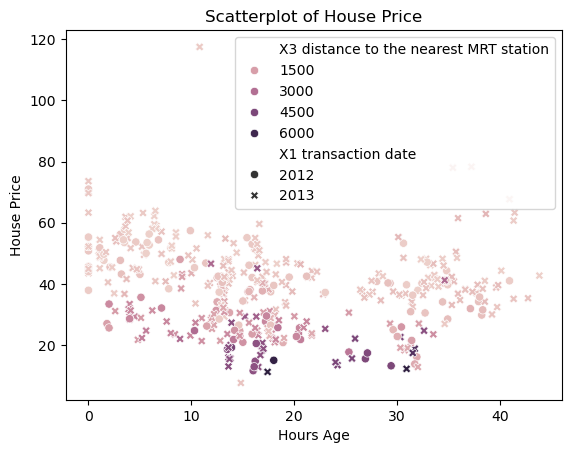

In [301]:
sns.scatterplot(x='X2 house age',y= 'Y house price of unit area',hue='X3 distance to the nearest MRT station',style='X1 transaction date',data=df)
plt.title('Scatterplot of House Price')
plt.xlabel('Hours Age')
plt.ylabel('House Price')


In [302]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

In [303]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [304]:
x.head(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9


In [305]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [346]:
y_test

339    50.4
408    28.1
55     13.7
64     25.3
248    22.3
       ... 
204    26.6
89     25.3
302    23.2
45     38.3
38     47.7
Name: Y house price of unit area, Length: 125, dtype: float64

In [306]:
X_train.shape

(289, 4)

In [307]:
X_test.shape

(125, 4)

In [308]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [309]:
y_lr_predict=model_lr.predict(X_test)

In [310]:
r2_score(y_test,y_lr_predict)

0.5646326060430285

In [311]:
mse=mean_squared_error(y_test,y_lr_predict)
mse

90.06772702931639

In [312]:
y_lr_predict

array([47.95215326, 31.53315054, 27.70294533, 35.06291113, 34.59698196,
       37.08532413, 43.30467697, 44.81869332, 39.12093597, 34.92940928,
       27.70929662, 35.88873811, 36.76504828, 38.07580433, 16.10168755,
       48.41892384, 44.06239506, 18.66355613, 22.96550425, 34.10344298,
       42.50261931, 52.16345615, 31.85953614, 49.62867694, 39.05600342,
       47.74024494, 49.52009682, 41.39281889, 32.60777111, 39.40450437,
       49.33777796, 38.44562898, 49.87628707, 40.97731296, 46.21463882,
       50.97992039, 33.52283648, 27.68125023, 32.95501964, 36.17185834,
       49.57253051, 43.17558239, 35.24753151, 45.13760594, 43.54456617,
       52.11102245, 29.86683405, 27.73368393, 41.0404678 , 47.33661785,
       33.75456094, 49.62867694, 31.37900118, 33.26713958, 39.57781386,
       42.90586119, 38.96244105, 37.65072261, 39.35597391, 44.36987767,
       49.90250392, 44.80707818, 30.77470098, 40.73557935, 29.12502577,
       43.5618455 , 45.39099505, 46.88045022, 24.80126006, 44.34

In [313]:
y_lr_predict.shape

(125,)

In [314]:
print(model_lr.coef_)
print(model_lr.intercept_)

[ 2.74822672 -0.26216849 -0.00539159  1.03147308]
-5487.16083299755


In [315]:
type(y_lr_predict)

numpy.ndarray

In [316]:
df_pred = pd.DataFrame(y_lr_predict, columns=['LR_Predicted Price'])

In [317]:
df_pred

,LR_Predicted Price
0,47.952153
1,31.533151
2,27.702945
3,35.062911
4,34.596982
...,...
120,33.703785
121,17.703997
122,31.452190
123,41.040468


In [318]:
def polynomial_regression(power):
    poly = PolynomialFeatures(degree=power,include_bias=True)
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.transform(X_test)
    model_lr=LinearRegression()
    model_lr.fit(X_train_trans,y_train)
    y_poly_pred = model_lr.predict(X_test_trans)
    r2_for_poly=r2_score(y_test,y_poly_pred)
    mse_for_poly=mean_squared_error(y_test,y_poly_pred)
    print(f'R2_score_using_poly: {r2_for_poly}')
    print(f'mean squared error_using_poly: {mse_for_poly}')
    return pd.DataFrame(y_poly_pred, columns=['Poly_Predicted Price'])

In [319]:
##Function_Calling_using_different_power and comparing to LR model
a=polynomial_regression(2)
print(f'R2_score_using_LR: {r2_score(y_test,y_lr_predict)}')
print(f'mean_squared_error_using_LR: {mean_squared_error(y_test,y_lr_predict)}')

R2_score_using_poly: 0.6613827631829559
mean squared error_using_poly: 70.05229439867782
R2_score_using_LR: 0.5646326060430285
mean_squared_error_using_LR: 90.06772702931639


In [320]:
comarison=X_test

In [347]:
# Convert Series to DataFrame
df_y_test = pd.DataFrame(y_test.values, columns=['Y house price of unit area'])

In [348]:
df_y_test

,Y house price of unit area
0,50.4
1,28.1
2,13.7
3,25.3
4,22.3
...,...
120,26.6
121,25.3
122,23.2
123,38.3


In [321]:
comarison['LR_Predicted Price']=df_pred['LR_Predicted Price'].values

In [324]:
comarison['Poly_Predicted Price']=a['Poly_Predicted Price'].values

In [349]:
comarison['Y house price of unit area']=df_y_test['Y house price of unit area'].values

In [350]:
comarison.head(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,LR_Predicted Price,Poly_Predicted Price,Y house price of unit area
339,2013,1.7,329.9747,5,47.952153,52.853205,50.4
408,2013,18.5,2175.7440,3,31.533151,23.687043,28.1


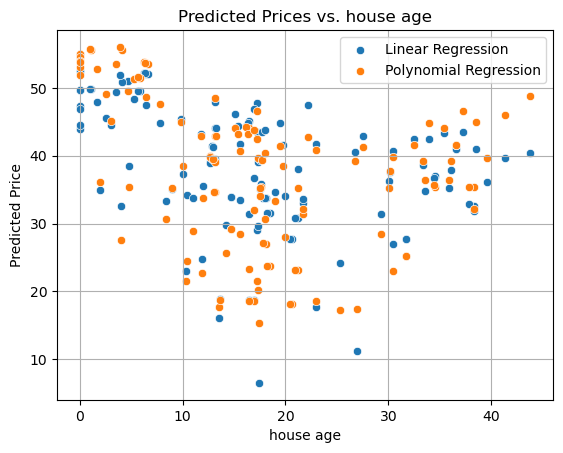

In [351]:
sns.scatterplot(
    x='X2 house age',
    y='LR_Predicted Price',
    data=comarison,
    label='Linear Regression'
)

# Plot Polynomial Regression predictions
sns.scatterplot(
    x='X2 house age',
    y='Poly_Predicted Price',
    data=comarison,
    label='Polynomial Regression'
)

plt.title('Predicted Prices vs. house age')
plt.xlabel('house age')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

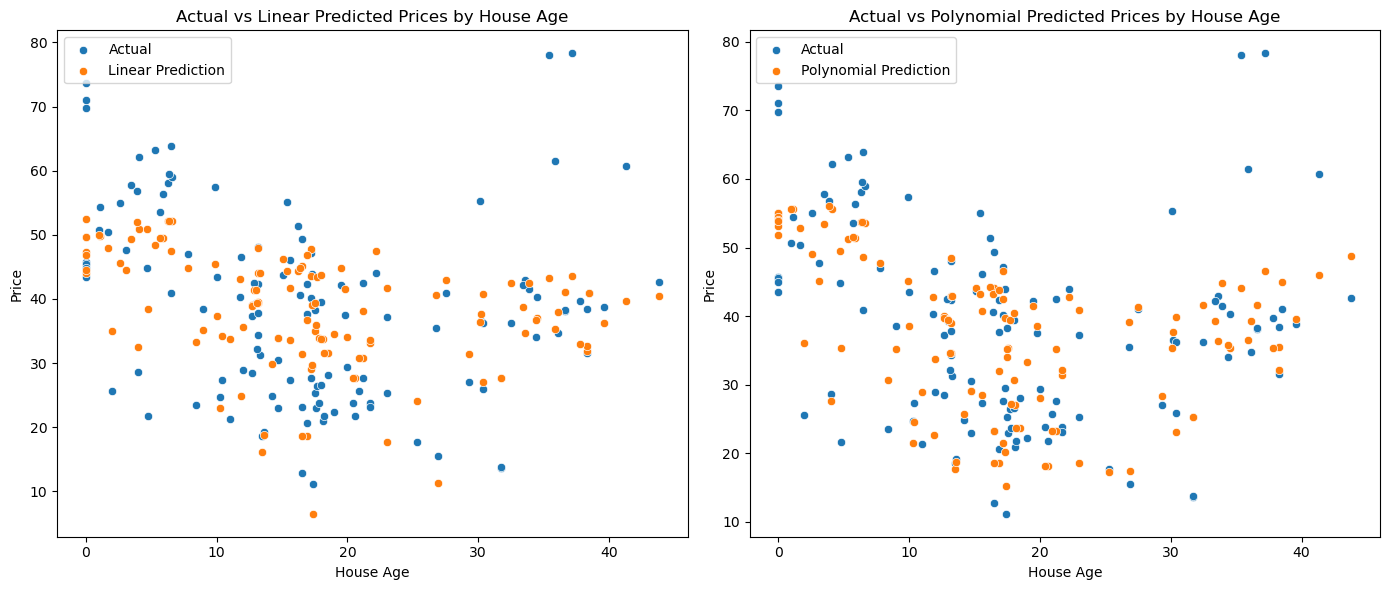

In [354]:
# Set up 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Actual vs. LR Prediction by House Age
sns.scatterplot(
    ax=axes[0],
    x='X2 house age',
    y='Y house price of unit area',
    data=comarison,
    label='Actual'
)
sns.scatterplot(
    ax=axes[0],
    x='X2 house age',
    y='LR_Predicted Price',
    data=comarison,
    label='Linear Prediction'
)
axes[0].set_title('Actual vs Linear Predicted Prices by House Age')
axes[0].set_xlabel('House Age')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot 2: Actual vs. Polynomial Prediction by House Age
sns.scatterplot(
    ax=axes[1],
    x='X2 house age',
    y='Y house price of unit area',
    data=comarison,
    label='Actual'
)
sns.scatterplot(
    ax=axes[1],
    x='X2 house age',
    y='Poly_Predicted Price',
    data=comarison,
    label='Polynomial Prediction'
)
axes[1].set_title('Actual vs Polynomial Predicted Prices by House Age')
axes[1].set_xlabel('House Age')
axes[1].set_ylabel('Price')
axes[1].legend()

plt.tight_layout()
plt.show()